# Customer Segmentation Using K-Means Clustering

In this notebook, we will perform customer segmentation using the K-Means clustering algorithm. The goal is to group customers into distinct segments based on their purchasing behavior and demographic information. This will allow us to tailor marketing strategies to each customer segment.

## Step 1: Data Loading and Initial Exploration

First, we load the dataset and explore its structure to understand what kind of data we're working with.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'lg_customer_segmentation.csv'
df = pd.read_csv(file_path)

# Display the first few rows 
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Display basic statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Explanation:
- We load the dataset using `pandas`.
- The `head()` function gives us the first few rows to quickly inspect the data.
- `info()` provides information about the data types and missing values.
- `describe()` gives statistical summaries of numerical columns.


| Feature | Description |
|---|---|
| Id | Unique identifier for each individual in the dataset. |
| Year_Birth | The birth year of the individual. |
| Education | The highest level of education attained by the individual. |
| Marital_Status | The marital status of the individual. |
| Income | The annual income of the individual. |
| Kidhome | The number of young children in the household. |
| Teenhome | The number of teenagers in the household. |
| Dt_Customer | The date when the customer was first enrolled or became a part of the company's database. |
| Recency | The number of days since the last purchase or interaction. |
| MntWines | The amount spent on wines. |
| MntFruits | The amount spent on fruits. |
| MntMeatProducts | The amount spent on meat products. |
| MntFishProducts | The amount spent on fish products. |
| MntSweetProducts | The amount spent on sweet products. |
| MntGoldProds | The amount spent on gold products. |
| NumDealsPurchases | The number of purchases made with a discount or as part of a deal. |
| NumWebPurchases | The number of purchases made through the company's website. |
| NumCatalogPurchases | The number of purchases made through catalogs. |
| NumStorePurchases | The number of purchases made in physical stores. |
| NumWebVisitsMonth | The number of visits to the company's website in a month. |
| AcceptedCmp3 | Binary indicator (1 or 0) whether the individual accepted the third marketing campaign. |
| AcceptedCmp4 | Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign. |
| AcceptedCmp5 | Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign. |
| AcceptedCmp1 | Binary indicator (1 or 0) whether the individual accepted the first marketing campaign. |
| AcceptedCmp2 | Binary indicator (1 or 0) whether the individual accepted the second marketing campaign. |
| Complain | Binary indicator (1 or 0) whether the individual has made a complaint. |
| Z_CostContact | A constant cost associated with contacting a customer. |
| Z_Revenue | A constant revenue associated with a successful campaign response. |
| Response | Binary indicator (1 or 0) whether the individual responded to the marketing campaign. |ded to the marketing campaign.

## Step 2: Data Cleaning

Next, we address any missing values and ensure the dataset is clean and ready for analysis.

In [4]:
# Check for missing values
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


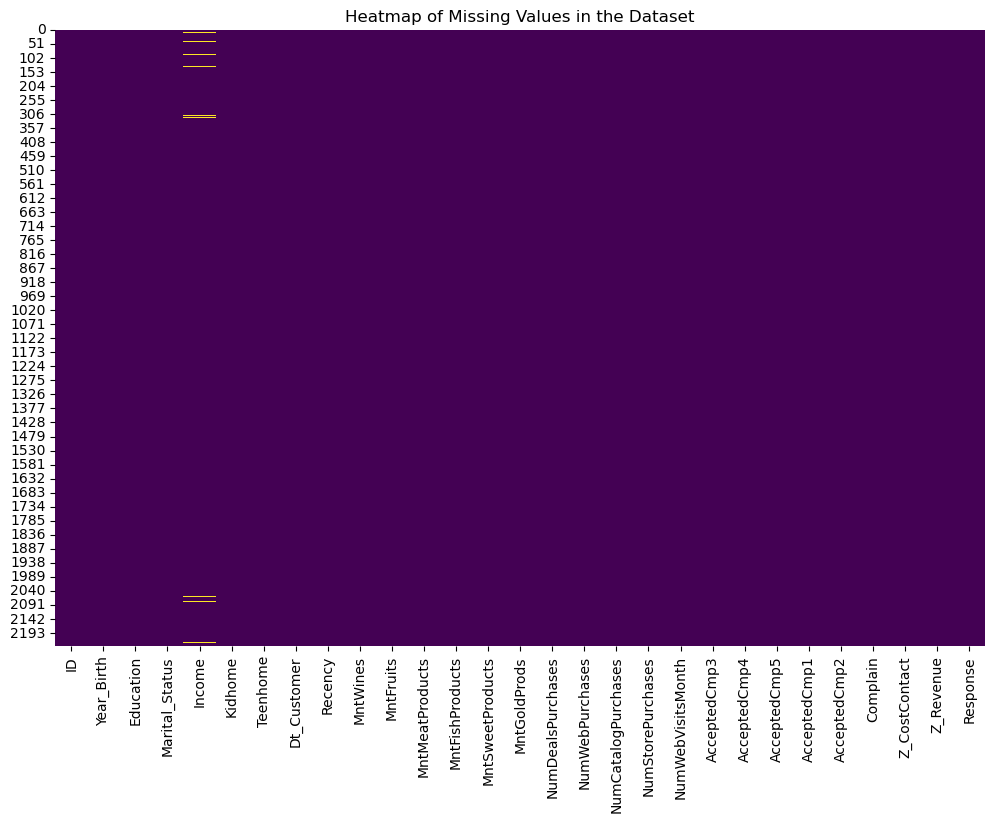

In [5]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in the Dataset')
plt.show()

- It can be seen that the Income has 24 missing values. This prompts the use of imputation method to fill in the missing values

In [6]:
# Handling missing values in the 'Income' column by filling with the median
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# Verify that there are no missing values left
print(df.isnull().sum())


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [7]:
# Check for duplicates
print("\nDuplicate rows:")
print(df.duplicated().sum()) 


Duplicate rows:
0


There are no duplicate rows

- Handling Outliers

In [8]:
from scipy.stats import zscore

# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate Z-scores for each numeric column
z_scores = np.abs(zscore(df[numeric_cols]))

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers based on the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove rows containing outliers
df_cleaned = df[~outliers]

print("\nDataset after handling outliers:")
print(df.shape)


Dataset after handling outliers:
(2240, 29)


### Explanation:
- We fill missing values in the 'Income' column with the median income to prevent any bias in our analysis.
- The `isnull().sum()` function helps us confirm that there are no remaining missing values.


## Step 3: Data Transformation

We need to transform some of the data to make it suitable for analysis, including converting categorical variables and extracting meaningful features from dates.

In [9]:
# Convert the 'Dt_Customer' (date of customer enrollment) to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# Extract relevant features from the 'Dt_Customer' column, such as the number of days since enrollment
df['Days_Customer'] = (pd.Timestamp.now() - df['Dt_Customer']).dt.days

# Drop the original 'Dt_Customer' column as it's no longer needed
df.drop(columns=['Dt_Customer'], inplace=True)

# Display the transformed data
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

   Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0       58       635         88  ...             0             0   
1       38        11          1  ...             0             0   
2       26       426         49  ...             0             0   
3       26        11          4  ...             0             0   
4       94       173         43  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0       

### Explanation:
- Categorical variables ('Education', 'Marital_Status') are converted into numerical form using one-hot encoding.
- The 'Dt_Customer' column is converted to a datetime format, and we create a new feature 'Days_Customer' representing the number of days since the customer enrolled.
- The original date column is dropped as it's no longer necessary.


## Data Visualization for Understanding the Dataset

After cleaning and transforming the data, it's essential to explore and visualize the dataset to gain insights into the distribution of features, relationships between variables, and any potential patterns.

1. Distribution of Numerical Features
Visualizing the distribution of numerical features helps in understanding the range, central tendency, and spread of the data, as well as identifying any potential outliers.

In [10]:
sns.set(style="whitegrid")

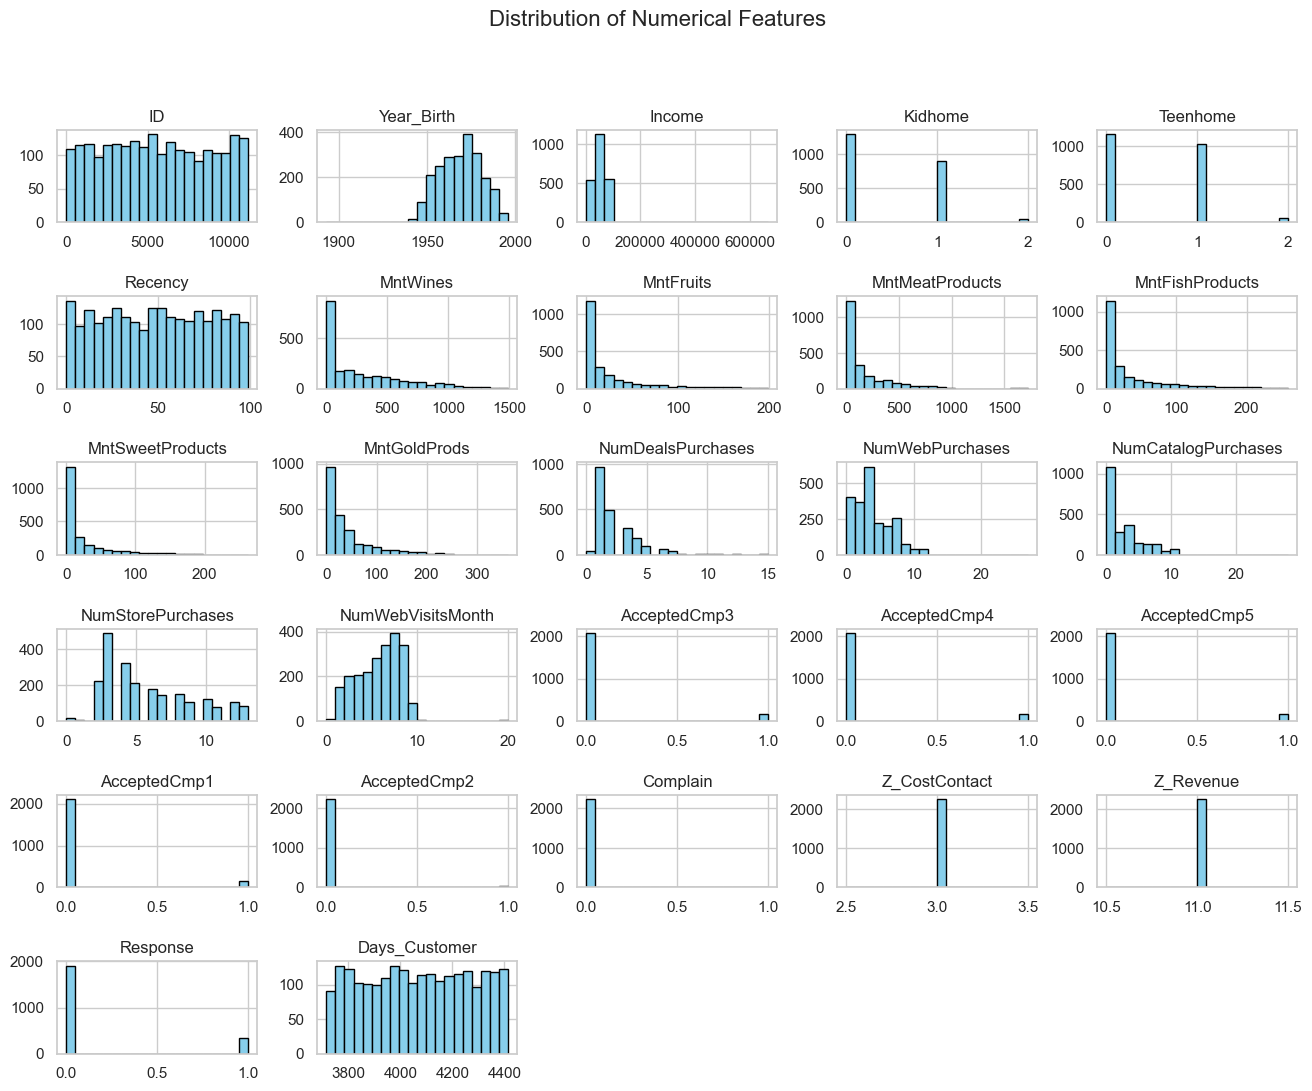

In [11]:
# Distribution of Numerical Features
df.hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

### Distribution of Numerical Features:
- **Purpose:** The histograms provide an overview of how numerical features like 'Income', 'Age', 'Total_Mnt', etc., are distributed across the dataset.
- **Insights:** This can reveal if the data is skewed, where most data points lie, and if there are any outliers.


### Correlation Heatmap

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,3,11,1,4378
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,3,11,0,3828
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,3,11,0,4027
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,3,11,0,3854
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,3,11,0,3876


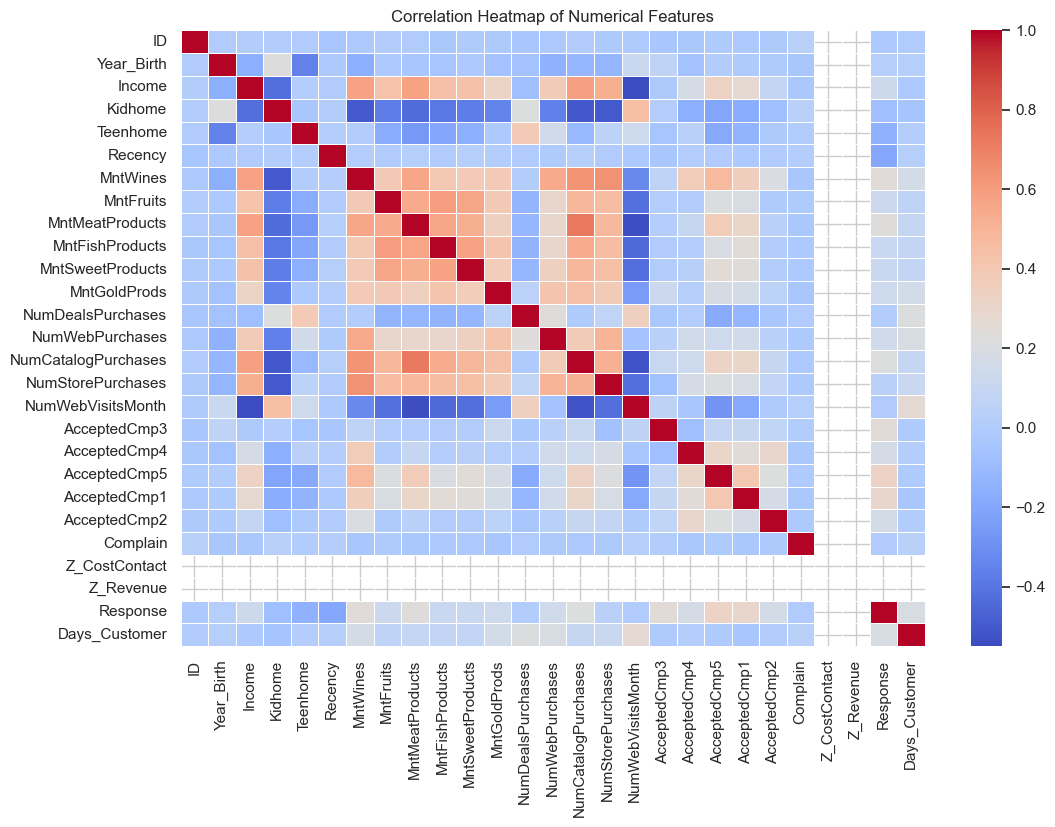

In [13]:
# Correlation matrix and heatmap
df_filtered = df.drop(['Education', 'Marital_Status'], axis=1)
plt.figure(figsize=(12, 8))
corr_matrix = df_filtered.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Correlation Heatmap:
- **Purpose:** This heatmap visualizes the correlation coefficients between numerical features, highlighting positive and negative relationships.
- **Insights:** Strong correlations (either positive or negative) between features can inform feature selection and engineering steps later in the analysis.


### Barplots of Categorical Features
Barplots visualize the distribution of categorical features, helping to understand the composition of the dataset.

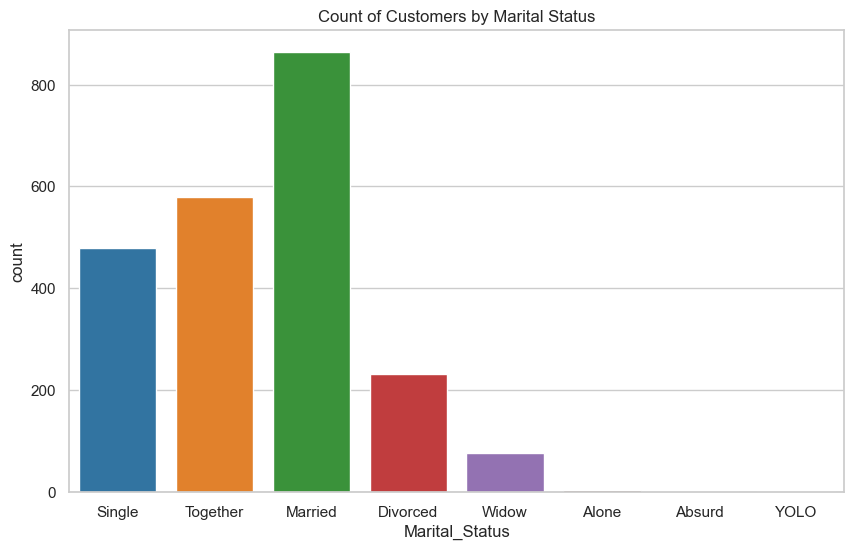

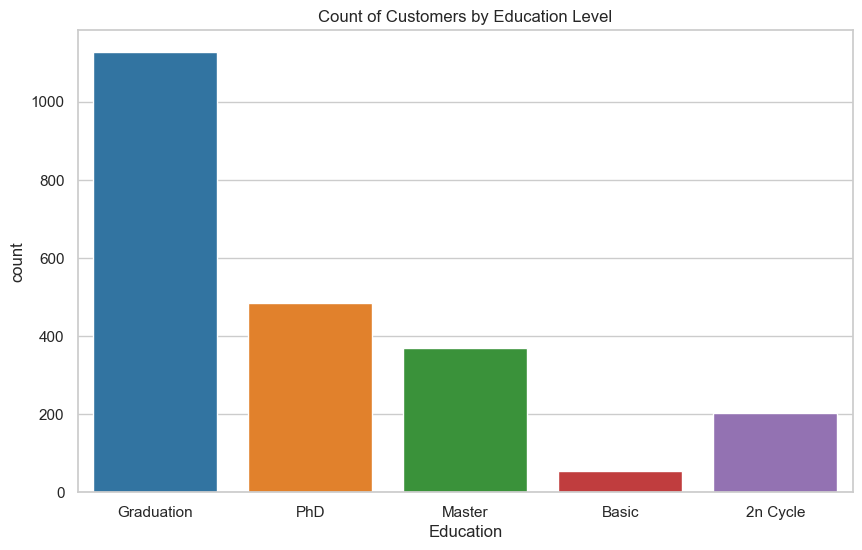

In [14]:
# 4.5 Barplots of Categorical Features
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=df, palette='tab10')
plt.title('Count of Customers by Marital Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df, palette='tab10')
plt.title('Count of Customers by Education Level')
plt.show()

### Barplots of Categorical Features:
- **Purpose:** These barplots show the frequency of different categories within categorical features.
- **Insights:** This helps in understanding the distribution of the dataset across different demographic groups.


It can noticed that most of our customer base are married and also high school graduates.

## Step 4: Feature Engineering

We create new features to enhance the dataset and improve the quality of our analysis.

In [15]:
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

#### One-Hot Encoding
- **Purpose:** Convert categorical variables (`Education`, `Marital_Status`) into a numerical format suitable for modeling.
- **Action:** Used one-hot encoding to create binary columns for each category, excluding the first category as a reference (`drop_first=True`).
- **Outcome:** The dataframe now includes additional binary columns for each category, with `0` or `1` values.
"""

In [16]:
# Ensure that all the resulting boolean columns are converted to integers (0 or 1)
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

- **Action:** Converted any boolean (`True/False`) columns resulting from one-hot encoding into integers (`0/1`) to ensure all data is numerical.
- **Outcome:** The dataframe now includes additional binary columns for each category with `0` or `1` values.

In [17]:
# Total amount spent across all product categories
df['Total_Mnt'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

#### Total Amount Spent (Total_Mnt)
- **Purpose:** Aggregate the spending across all product categories into a single feature.
- **Action:** Summed the amounts spent on wines, fruits, meat products, fish products, sweet products, and gold products.
- **Outcome:** Created a new column `Total_Mnt` representing the total spending for each customer.
"""

In [18]:
# Total number of purchases across all channels
df['Total_Purchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

Total Number of Purchases (Total_Purchases)
- **Purpose:** Aggregate the number of purchases across all channels into a single feature.
- **Action:** Summed the number of purchases from deals, web, catalog, and stores.
- **Outcome:** Created a new column `Total_Purchases` representing the total number of purchases made by each customer.
"""

In [19]:
# Average amount spent per purchase, avoiding division by zero
df['Avg_Mnt_Per_Purchase'] = df['Total_Mnt'] / df['Total_Purchases'].replace(0, np.nan)


Average Amount Spent Per Purchase (Avg_Mnt_Per_Purchase)
- **Purpose:** Calculate the average spending per purchase to understand customer spending behavior.
- **Action:** Divided the total amount spent by the total number of purchases, replacing `0` purchases with `NaN` to avoid division errors.
- **Outcome:** Created a new column `Avg_Mnt_Per_Purchase` reflecting the average spending per purchase.
"""

In [20]:
# Replace any resulting NaN values with 0 (for cases where Total_Purchases was 0)
df['Avg_Mnt_Per_Purchase'].fillna(0, inplace=True)

Handle NaN Values in Average Amount Spent Per Purchase
- **Purpose:** Ensure there are no missing values in the `Avg_Mnt_Per_Purchase` column.
- **Action:** Replaced any `NaN` values with `0` to handle cases where there were no purchases.
- **Outcome:** The `Avg_Mnt_Per_Purchase` column is now complete with no missing values.
"""

In [21]:
# Recency inverse: More recent customers might be more valuable, avoiding division by zero
df['Recency_Inverse'] = 1 / df['Recency'].replace(0, np.nan)

Recency Inverse (Recency_Inverse)
- **Purpose:** Transform the `Recency` variable to better reflect customer value, with more recent customers being more valuable.
- **Action:** Calculated the inverse of `Recency` (days since last purchase), replacing `0` recency with `NaN` to avoid division errors.
- **Outcome:** Created a new column `Recency_Inverse` to represent the inverse of recency.
"""

In [22]:
# Replace any resulting NaN values with 0 (for cases where Recency was 0)
df['Recency_Inverse'].fillna(0, inplace=True)

 Handle NaN Values in Recency Inverse
- **Purpose:** Ensure there are no missing values in the `Recency_Inverse` column.
- **Action:** Replaced any `NaN` values with `0` to handle cases where `Recency` was `0`.
- **Outcome:** The `Recency_Inverse` column is now complete with no missing values.
"""

In [23]:
# Drop columns that have been aggregated or transformed
df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], inplace=True)

Drop Transformed Columns
- **Purpose:** Remove redundant columns that have been aggregated or transformed into new features.
- **Action:** Dropped the original columns related to amounts spent and purchase numbers.
- **Outcome:** The dataframe is now streamlined, retaining only the engineered features.

In [24]:
# Ensure all categorical columns are numerical
df = pd.get_dummies(df, drop_first=True)

Final One-Hot Encoding
- **Purpose:** Ensure all remaining categorical variables are converted into numerical format.
- **Action:** Applied one-hot encoding to any remaining categorical columns, excluding the first category for each as a reference (`drop_first=True`).
- **Outcome:** The dataframe is fully numeric and ready for modeling.

### Explanation:
- We create new features such as 'Total_Mnt' (total spending), 'Total_Purchases', and 'Avg_Mnt_Per_Purchase'.
- 'Recency_Inverse' is created to represent the value of recent customers.
- We drop columns that have been aggregated to simplify the dataset.


In [25]:
columns_to_drop = ['ID', 'Year_Birth', 'Kidhome', 'Days_Customer', 'Education_Basic', 'Education_Graduation',
                   'Education_Master', 'Education_PhD', 'Marital_Status_Alone',
                   'Marital_Status_Divorced', 'Marital_Status_Married','Recency_Inverse', 'Z_Revenue',
                   'Marital_Status_Single', 'Marital_Status_Together', 'Income', 'Recency', 'Total_Mnt','Avg_Mnt_Per_Purchase',
                   'Marital_Status_Widow', 'Marital_Status_YOLO']

# Drop the columns
df = df.drop(columns=columns_to_drop)


In [26]:
# Display the first few rows to verify the changes
df.head()

,Teenhome,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Response,Total_Purchases
0,0,7,0,0,0,0,0,0,3,1,25
1,1,5,0,0,0,0,0,0,3,0,6
2,0,4,0,0,0,0,0,0,3,0,21
3,0,6,0,0,0,0,0,0,3,0,8
4,0,5,0,0,0,0,0,0,3,0,19


### Saving the Data

In [27]:
# Save the cleaned and scaled dataset to a CSV file locally
file_path = 'Finalized_LG_Corporation_Dataset.csv'
df.to_csv(file_path, index=False)

print(f"The cleaned and scaled dataset has been saved as '{file_path}'.")

The cleaned and scaled dataset has been saved as 'Finalized_LG_Corporation_Dataset.csv'.


## Step 5: Data Preprocessing

Now, we prepare the data for clustering by scaling the features.

In [28]:
from sklearn.preprocessing import StandardScaler

# Drop the 'Response' column if it exists, as we are focusing on unsupervised learning
if 'Response' in df.columns:
    df.drop(columns=['Response'], inplace=True)

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### Explanation:
- We drop the 'Response' column as we are focusing on unsupervised learning with K-Means clustering.
- Features are scaled using `StandardScaler` to ensure they are on a similar scale, which is important for distance-based algorithms like K-Means.


## Step 6: Model Development with K-Means Clustering

We apply the K-Means algorithm to identify customer segments and determine the optimal number of clusters.

In [29]:
# Dimensionality Reduction
# Apply PCA to reduce dimensions before clustering
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
data_pca = pca.fit_transform(df)

In [30]:
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)


C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Adeitan

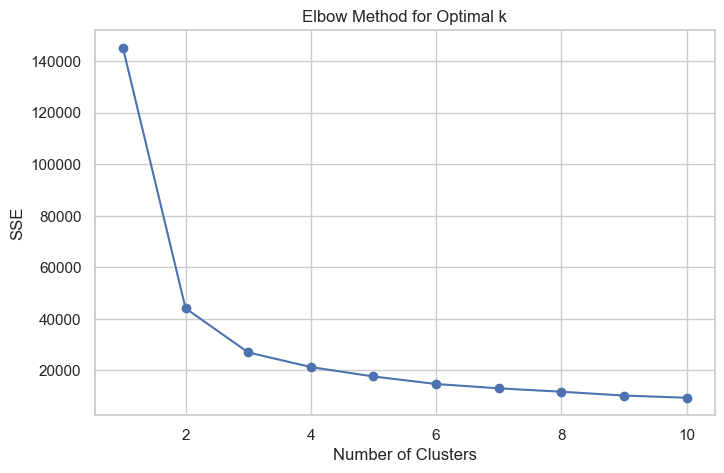

In [31]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

### Explanation:
- The elbow method is used to find the optimal number of clusters by plotting the inertia (sum of squared distances) for different values of k.
- We select the optimal number of clusters based on the elbow point in the curve.
- The K-Means algorithm is applied to assign each customer to a cluster.


Based on the Elbow Method graph, the optimal number of clusters (K) is 3. This is where the "elbow" or significant change in the slope occurs, indicating diminishing returns in reducing the Sum of Squared Errors (SSE) beyond this point.

In [32]:
# Choose the optimal number of clusters (based on the elbow curve) and fit KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_pca)

C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Evaluate Clusters

In [33]:
# Calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(data_pca, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4987085906971901


C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


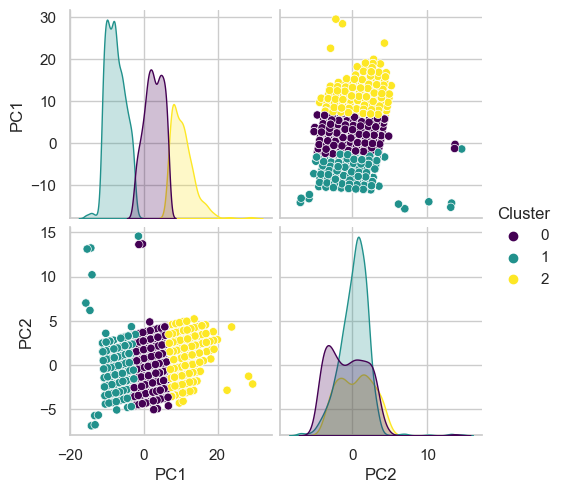

In [34]:
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca_df['Cluster'] = df['Cluster']
sns.pairplot(data_pca_df, hue='Cluster', palette='viridis')
plt.show()

## Cluster Interpretation and Labeling

In [35]:
# Analyze the cluster centroids to understand the customer segments
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2'])
centroids['Cluster'] = range(optimal_k)
print("Cluster Centroids:\n", centroids)

Cluster Centroids:
          PC1       PC2  Cluster
0   2.597607 -0.588995        0
1  -7.680935  0.238837        1
2  10.465192  0.438907        2


In [36]:

# Define meaningful labels for the clusters based on the centroids
cluster_labels = {
    0: 'Low Satisfaction, Infrequent Buyers',
    1: 'High Satisfaction, Frequent Buyers',
    2: 'Moderate Satisfaction, Average Buyers'
}

# Map the cluster numbers to labels
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

# Display the final dataset with clusters and their labels
print(df[['Cluster', 'Cluster_Label']].head())

   Cluster                          Cluster_Label
0        2  Moderate Satisfaction, Average Buyers
1        1     High Satisfaction, Frequent Buyers
2        0    Low Satisfaction, Infrequent Buyers
3        1     High Satisfaction, Frequent Buyers
4        0    Low Satisfaction, Infrequent Buyers


### Conclusion
The clustering analysis of LG Corporation customer behavior has successfully segmented the customers into three distinct groups, each reflecting different levels of satisfaction and buying frequency:

1. Low Satisfaction, Infrequent Buyers (Cluster 0): This group constitutes customers who are generally dissatisfied and infrequent in their purchases. These customers might be disengaged or have had negative experiences, making them less likely to be repeat buyers. To improve engagement, LG Corporation could consider targeted marketing strategies, personalized offers, or addressing potential pain points in their shopping experience.

2. Moderate Satisfaction, Average Buyers (Cluster 2): Customers in this segment exhibit moderate satisfaction with their shopping experiences and have an average frequency of purchases. This group represents a middle ground and may be more susceptible to influence. By enhancing their shopping experience or offering incentives, LG Corporation could potentially convert these customers into more loyal, frequent buyers.

3. High Satisfaction, Frequent Buyers (Cluster 1): This segment includes highly satisfied customers who frequently make purchases. These customers are likely loyal and engaged, contributing significantly to LG Corporation's revenue. Maintaining their satisfaction through continued excellent service, exclusive offers, and rewards could help retain this valuable customer base.

Overall, the clustering results provide valuable insights into customer segments, enabling LG Corporation to tailor its strategies to meet the specific needs of each group. This segmentation can guide targeted marketing efforts, improve customer satisfaction, and ultimately enhance customer loyalty and business growth.

### Insights Gained from Visualizations:
- Cluster Separation: The PCA plot shows distinct groupings, which indicates that the K-Means model effectively segmented the customers into meaningful groups.
- Overlap Considerations: Some overlap might occur, indicating customers with mixed characteristics, which could be explored further with different clustering techniques or additional features.
- Strategic Application: Visualizing the clusters helps in identifying strategies tailored to each segment, such as personalized marketing, targeted promotions, and customer retention plans.
  
This complete analysis provides a comprehensive approach to understanding the customer segments, ensuring that the insights are actionable and supported by clear visual evidence.graphics.


## Link to AWS SageMaker Endpoint

https://runtime.sagemaker.us-east-1.amazonaws.com/endpoints/sagemaker-scikit-learn-2024-08-31-12-46-14-653/invocations

* SageMaker endpoints are designed to be accessed via API calls rather than through direct browser access.
* To interact with your SageMaker endpoint, use the AWS SDK for Python (Boto3) or the AWS CLI to send requests. 

## Link to Github Repository